In [54]:
## Model Training
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

##Modleing
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [25]:
df = pd.read_csv("Student.csv")

In [26]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [27]:
x = df.drop(columns=["math score"],axis=1)
y = df["math score"]


In [29]:
## Create column Transformer 
num_features = [feature for feature in x.columns if df[feature].dtype!='O']
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler = StandardScaler()
encoder = OneHotEncoder()
preprocessor = ColumnTransformer([
    ("OneHotEncoder",encoder,cat_features),
    ("StandardScaler",scaler,num_features)
    ])


In [31]:
x = preprocessor.fit_transform(x)

In [32]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
def evaluate(true, predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    score = r2_score(true,predicted)
    return mse,mae,score

In [48]:
models = {"Linear Regression" : LinearRegression(),
          "Lasso" : Lasso(),
          "Ridge" : Ridge(),
          "k-Neighbour Regression" : KNeighborsRegressor(),
          "Decision Tree" : DecisionTreeRegressor(),
          "Random Forest Regressor" : RandomForestRegressor(),
          "XGboostRegressor" : XGBRegressor(),
          "AdaboostReg" : AdaBoostRegressor()
          }
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) #train model

    #make Predection
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate train and test datset
    model_train_mse , model_train_mae,model_train_score = evaluate(y_train,y_train_pred)
    model_test_mse , model_test_mae,model_test_score = evaluate(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Tarining data")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Absolute mean error: {:.4f}".format(model_train_mae))
    print("- R2 Score {:.4f}".format(model_train_score))


    print('--------------------------------------------------------------')

    
    print("Model performance for Testing data")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Absolute mean error: {:.4f}".format(model_test_mae))
    print("- R2 Score {:.4f}".format(model_test_score))
    r2_list.append(model_test_score)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Tarining data
- Root Mean Squared Error: 28.3349
- Absolute mean error: 4.2667
- R2 Score 0.8743
--------------------------------------------------------------
Model performance for Testing data
- Root Mean Squared Error: 29.0952
- Absolute mean error: 4.2148
- R2 Score 0.8804


Lasso
Model performance for Tarining data
- Root Mean Squared Error: 43.4784
- Absolute mean error: 5.2063
- R2 Score 0.8071
--------------------------------------------------------------
Model performance for Testing data
- Root Mean Squared Error: 42.5064
- Absolute mean error: 5.1579
- R2 Score 0.8253


Ridge
Model performance for Tarining data
- Root Mean Squared Error: 28.3378
- Absolute mean error: 4.2650
- R2 Score 0.8743
--------------------------------------------------------------
Model performance for Testing data
- Root Mean Squared Error: 29.0563
- Absolute mean error: 4.2111
- R2 Score 0.8806


k-Neighbour Regression
Model performance for Tarining data
- Roo

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)


,model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854106
7,AdaboostReg,0.841706
6,XGboostRegressor,0.827797
1,Lasso,0.825320
3,k-Neighbour Regression,0.784030
4,Decision Tree,0.742170


In [50]:
## Linear Regression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_pred, y_test)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.70


In [51]:
pred_df = pd.DataFrame({'Actual value' : y_test,'Predicted value' : y_test_pred,"Difference" : y_test-y_test_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,77.325301,13.674699
737,53,58.401786,-5.401786
740,80,77.085227,2.914773
660,74,77.792857,-3.792857
411,84,84.650000,-0.650000
...,...,...,...
408,52,46.850394,5.149606
332,62,56.894309,5.105691
208,74,67.417062,6.582938
613,65,67.720238,-2.720238


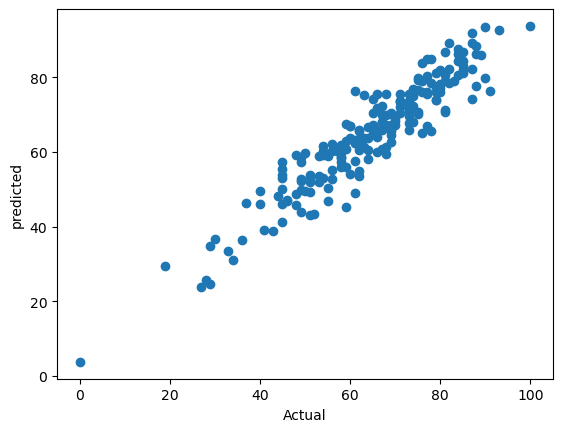

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [52]:
r2_list

[0.8804332983749564,
 0.8253197323627852,
 0.8805931485028738,
 0.7840299763621361,
 0.7421697520818744,
 0.8541055472771891,
 0.8277965784072876,
 0.84170612039153]

In [53]:
## This is complete model Training